In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
from src import Spotify
from src.utils import KMeans
from urllib.parse import urlencode, urlparse
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
sp = Spotify()

sp.search()
sp.get_genres()
sp.get_features()
sp.get_recommend(get_bak=True)

reco_sp = Spotify(sp.reco_tracks)
reco_sp.get_features()

계속하시려면 아무거나, 종료는 exit를 입력해주세요.exit


In [39]:
from sklearn.metrics import euclidean_distances as euc

my_features = sp.features.iloc[:, 1:].to_numpy()
reco_features = reco_sp.features.iloc[:,1:].to_numpy()

all_features = np.append(my_features, reco_features, axis=0)

_min = all_features.min(axis=0)
_max = all_features.max(axis=0)
norm_features = (all_features - _min) / (_max - _min)

ECV 57%
ECV 59%
ECV 60%
ECV 60%
ECV 61%
ECV 61%
ECV 62%
ECV 62%
ECV 62%
ECV 62%
ECV 62%
ECV 62%
ECV 62%
ECV 62%
ECV 62%
ECV 62%
ECV 62%


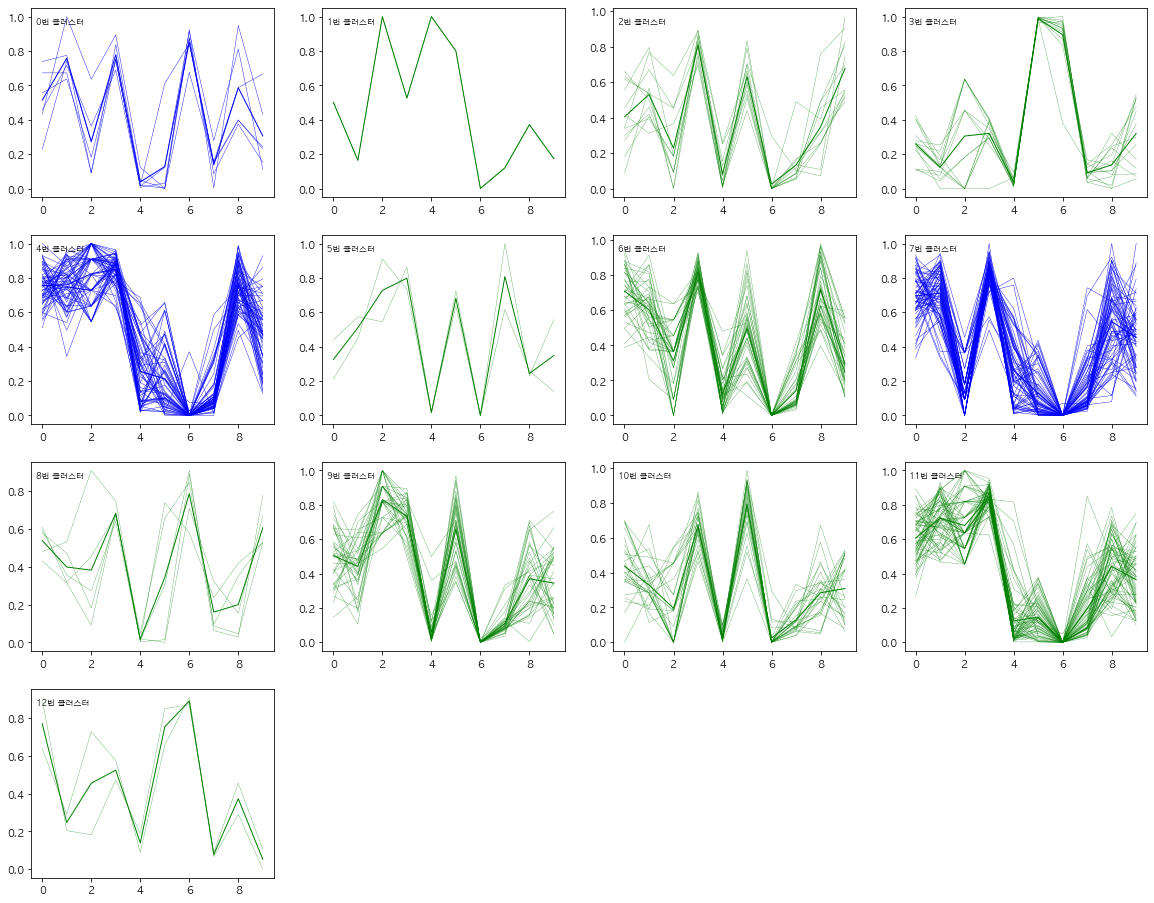

In [40]:
kmeans = KMeans(datas=norm_features)
kmeans.fit()
kmeans.cluster_plot(color_labels=np.unique(kmeans.labels_[:4]))

In [41]:
reco_labels = np.unique(kmeans.labels_[:4])

In [42]:
chk_features = reco_sp.sel_tracks.copy()

chk_features.head()

,trackId,trackName,artistIds,artistName,image,seedId
0,1KMa8z8VIjWCsDYCm3HWkP,Believe,0LyfQWJT6nXafLPZqxe9Of,Various Artists,https://i.scdn.co/image/ab67616d0000b2737d703e...,5iK8aeAYiyd0eZKfpaCdbI
1,3InpnrS4heaBYAZoLF1gms,Try (밑바닥에서),3NdOtTPPaXrCyC7Lpmzyhv,Tablo,https://i.scdn.co/image/ab67616d0000b273578a12...,5iK8aeAYiyd0eZKfpaCdbI
2,6vOkleLWWEcLzQp2tIhAe2,City Lights,6hyHuSf5Ft5jkSCmTg1RNn,Sunday Moon,https://i.scdn.co/image/ab67616d0000b2737295e6...,5iK8aeAYiyd0eZKfpaCdbI
3,1uZ5Ulb2qfle3HbqB12vNQ,Here I Am Again,6dhfy4ByARPJdPtMyrUYJK,Yerin Baek,https://i.scdn.co/image/ab67616d0000b2736413fc...,5iK8aeAYiyd0eZKfpaCdbI
4,6M2CiAIc4lZLAqJZPf690z,I'm in Love (Piano Remix),6zPbaYJp7itQ8p0gPLqf2S,Ra.D,https://i.scdn.co/image/ab67616d0000b2737c4285...,5iK8aeAYiyd0eZKfpaCdbI


In [43]:
chk_features[np.isin(kmeans.labels_[4:],reco_labels)][:100]['seedId'].value_counts()

4Nd7PP3Qnuwjb72dNkbE2f    37
3w9HSuLDejveVS9G8Qj8i0    36
5iK8aeAYiyd0eZKfpaCdbI    23
1CJweyedfMbIab2O3Jc8K8     4
Name: seedId, dtype: int64